In [5]:
import cv2
import glob
import numpy as np
import glob

In [6]:
data_path = glob.glob("Dataset/*")
data_path

['Dataset\\A',
 'Dataset\\Ha',
 'Dataset\\Ka',
 'Dataset\\Ma',
 'Dataset\\Na',
 'Dataset\\obj.names',
 'Dataset\\Ra',
 'Dataset\\Sa',
 'Dataset\\Ta',
 'Dataset\\Wa',
 'Dataset\\Ya']

In [12]:
# Load image and separate the text file
img_files = []
img_paths = []
txt_files = []
folders   = []
for idx, path in enumerate(data_path):
    if path.split("\\")[1] == "obj.names":
        continue
    
    temp_data = glob.glob(path + "/*")
    txt_file = []
    img_file = []
    img_path = []
    folder   = []
    for sub_idx, sub_path in enumerate(temp_data):
            if sub_path.split("\\")[2].split(".")[1]  == 'txt':
                txt_file.append(sub_path)
            else:
                img_path.append(sub_path)
                folder.append(sub_path.split("\\")[1])
                temp_img = cv2.imread(sub_path)
                temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
                img_file.append(temp_img)
    
    folders.append(folder)
    img_files.append(img_file)
    img_paths.append(img_path)
    txt_files.append(txt_file)

In [ ]:
#img_files = np.array(img_files)
#txt_files = np.array(txt_files)

In [13]:
import matplotlib.pyplot as plt

def plot_annotation(img, img_path, txt_path):
    # Check wether the filename is the same
    img_path = img_path.replace("//", "/")
    txt_path = txt_path.replace("//", "/")
    img_path = img_path.replace("\\", "/")
    txt_path = txt_path.replace("\\", "/")

    fname_img = img_path.split("/")[2].split(".")[0]
    fname_txt = txt_path.split("/")[2].split(".")[0]
    print("Image File Name {}, Text File Name {}".format(fname_img, fname_txt))
    if fname_img != fname_txt:
        print("Image and Text file is not correct")
        return img
    
    with open(txt_path, 'r') as f:
        data = f.readlines()
    
    # get image shape
    dh, dw, _ = img.shape
    
    # Split string to float
    for dt in data:
        _, x, y, w, h = map(float, dt.split(' '))

        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        img = cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
    return img

Image File Name 20220214_200405, Text File Name 20220214_200405


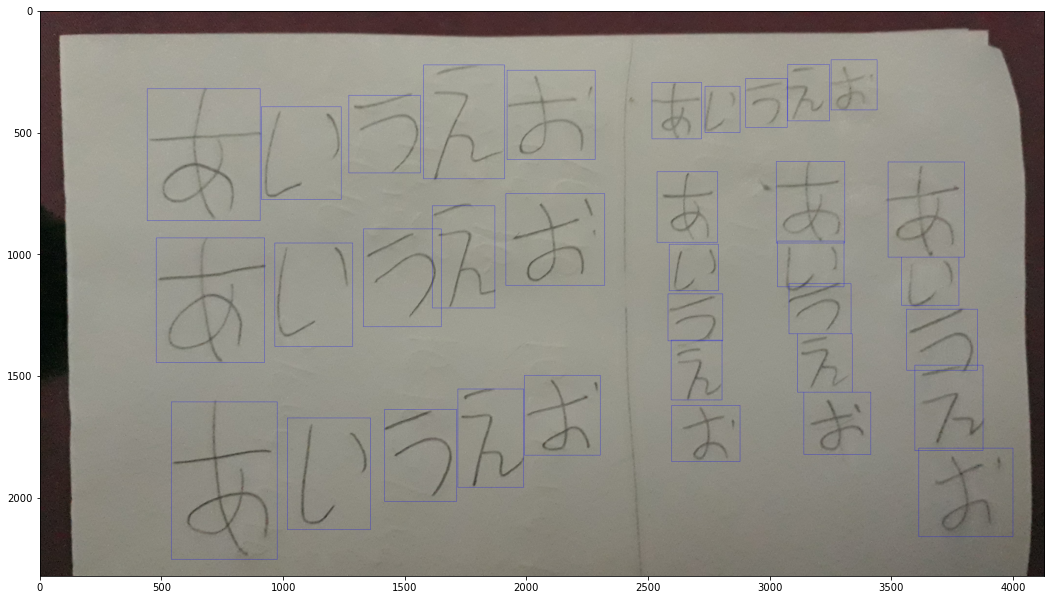

In [ ]:
# Try to plot

fig, ax = plt.subplots(figsize=(18, 18))
plt.imshow(plot_annotation(img_files[0][0], img_paths[0][0], txt_files[0][0]))

In [15]:
import random

# Split Train and Test
test_img = []
test_txt = []
test_folder = []
test_path = []
for idx, img_path in enumerate(img_paths):
    rand_idx = random.randint(0, len(folders[idx]) - 1)
    test_img.append(img_files[idx][rand_idx])
    test_txt.append(txt_files[idx][rand_idx])
    test_folder.append(folders[idx][rand_idx])
    test_path.append(img_paths[idx][rand_idx])
    # Remove from the main array
    img_files[idx].pop(rand_idx)
    img_paths[idx].pop(rand_idx)
    txt_files[idx].pop(rand_idx)
    folders[idx].pop(rand_idx)

Image File Name 20220214_200428, Text File Name 20220214_200428


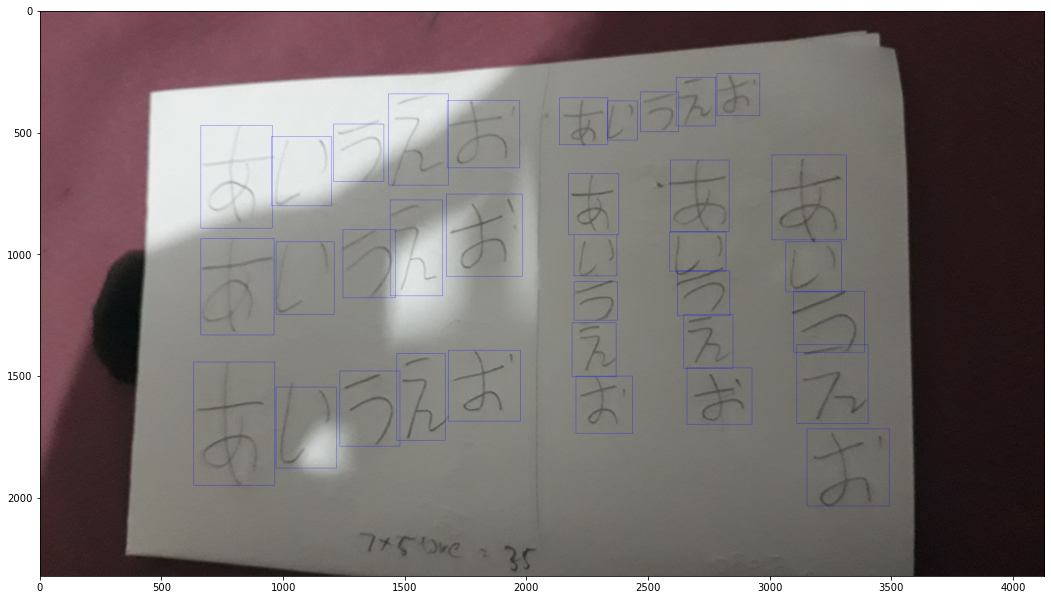

In [ ]:
fig, ax = plt.subplots(figsize=(18, 18))
plt.imshow(plot_annotation(test_img[0], test_path[0], test_txt[0]))

<p> Augmentation Method : </p>
<p>
    1. Brightness low, contrast standart </br>
    2. Brigtness high, contrast standart </br>
    3. Brigtness standard, contrast high </br>
    4. Brigtness standard, contrast low </br>
    5. Brigtness high, contrast high </br>
    6. Brigtness low, contrast low </br>
</p>

In [16]:
def brightness(img, brightness=255):    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        buf = cv2.addWeighted(img, alpha_b, img, 0, gamma_b)
    else:
        buf = img.copy()
        
    return buf

def contrast(img, alpha=1.5, beta=20):
    return cv2.addWeighted(img, alpha, np.zeros(img.shape, img.dtype), 0, beta)

Image File Name 20220214_200405, Text File Name 20220214_200405
Image File Name 20220303_134756, Text File Name 20220303_134756
Image File Name 20220214_203559, Text File Name 20220214_203559
Image File Name 20220308_180733, Text File Name 20220308_180733
Image File Name 20220303_134109, Text File Name 20220303_134109
Image File Name 20220308_174026, Text File Name 20220308_174026
Image File Name 20220214_205810, Text File Name 20220214_205810
Image File Name 20220303_133124, Text File Name 20220303_133124
Image File Name 20220308_183645, Text File Name 20220308_183645
Image File Name 20220308_182654, Text File Name 20220308_182654


<Figure size 1296x1296 with 0 Axes>

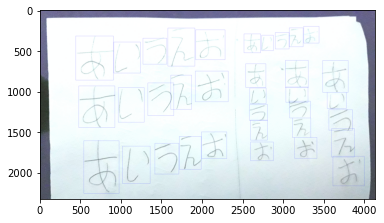

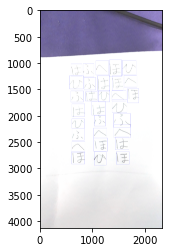

Error in callback <function flush_figures at 0x000002590CCD3310> (for post_execute):


KeyboardInterrupt: 

In [11]:
# Playing with augmentation
# Playing with Parameter
bright_level = 5
contrast_alpha = 1.5
beta = 30

processed_img = []
# Random Select an Image
for idx, img in enumerate(img_files):
    rand_idx = random.randint(0, len(img_files[idx]) - 1)
    temp_img = cv2.cvtColor(img[rand_idx], cv2.COLOR_BGR2RGB)
    temp_img = brightness(temp_img, bright_level)
    temp_img = contrast(temp_img, contrast_alpha, beta)
    
    processed_img.append(plot_annotation(temp_img, img_paths[idx][rand_idx], txt_files[idx][rand_idx]))

# Plot it
fig = plt.figure(figsize=(18, 18))
for idx, img in enumerate(processed_img):
    plt.figure()
    plt.imshow(img)

<p> Augmentation Method : </p>
<p>
    1. Brightness low, contrast standart </br>
    2. Brigtness high, contrast standart </br>
    3. Brigtness standard, contrast high </br>
    4. Brigtness standard, contrast low </br>
    5. Brigtness high, contrast high </br>
    6. Brigtness low, contrast low </br>
</p>
<p> Augmentation Method : </p>
<p>
    1. Brightness = -150, contrast=(a=1.5, b=20) </br>
    2. Brightness = 40, contrast=(a=1.5, b=20) </br>
    3. Brightness = 5, contrast=(a=2.5, b=40) </br>
    4. Brightness = 5, contrast=(a=1.0, b=10) </br>
    5. Brightness = 40, contrast=(a=2.5, b=40) </br>
    6. Brightness = -150, contrast=(a=1.0, b=10) </br>
</p>

In [17]:
brightness_setting = [-70, -100, 20, 30, 40, -40]
#contrast_setting = [[1.5, 20], [1.5, 20], [1.0, 20], [1.0, 10], [2.5, 20], [1.0, 10]]

In [18]:
base_path = "Augmented/train/"
# 6 Times Augmentation
img_files_aug = []
folders_aug   = []
img_paths_aug = []
augmented_txt_aug  = []
augmente_txt_aug_dest = []

for idx, img_set in enumerate(img_files):
    for idx2, img in enumerate(img_set):
        temp_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for idx_aug in range(len(brightness_setting)):
            temp_img = brightness(temp_img, brightness_setting[idx_aug])
            #temp_img = contrast(temp_img, contrast_setting[idx_aug][0], contrast_setting[idx_aug][1])
            img_files_aug.append(temp_img)
            
            # Define new name for img and txt
            new_name_img = base_path + img_paths[idx][idx2].split("\\")[2].split(".")[0] + "_augmented" + str(idx_aug) + ".png"
            new_name_txt = base_path + img_paths[idx][idx2].split("\\")[2].split(".")[0] + "_augmented" + str(idx_aug) + ".txt"
            
            # Append all required Data
            img_paths_aug.append(new_name_img)
            augmente_txt_aug_dest.append(new_name_txt)
            augmented_txt_aug.append(txt_files[idx][idx2])
            folders_aug.append(folders[idx][idx2])

A
Image File Name 20220214_200405_augmented0, Text File Name 20220214_200405
Image and Text file is not correct


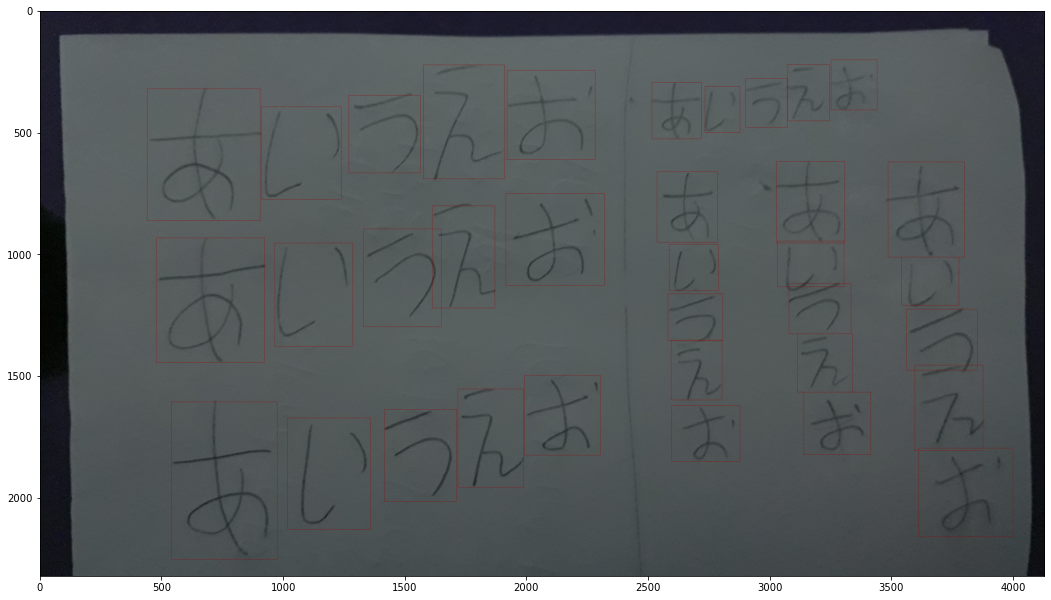

In [ ]:
fig, ax = plt.subplots(figsize=(18, 18))
print(folders_aug[0])
plt.imshow(plot_annotation(img_files_aug[0], img_paths_aug[0], augmented_txt_aug[0]))

In [19]:
import shutil
import os

# Save the image and generate train.txt

# Save the image and copy the text files with the same image name
for idx, img in enumerate(img_files_aug):
    # Write
    cv2.imwrite(img_paths_aug[idx], img_files_aug[idx])
    # Copy
    #print(augmented_txt_aug[idx], augmente_txt_aug_dest[idx])
    shutil.copy(augmented_txt_aug[idx], augmente_txt_aug_dest[idx])
    #os.rename(augmented_txt_aug[idx], augmente_txt_aug_dest[idx])

In [22]:
# Move the train set
base_save_dir = "Augmented/train"
for idx, upper_array in enumerate(img_files):
    for idx_img, img in enumerate(upper_array):
        temp_img_path = os.path.join(base_save_dir, img_paths[idx][idx_img].split("\\")[2])
        temp_txt_path = os.path.join(base_save_dir, txt_files[idx][idx_img].split("\\")[2])
        #print(temp_img_path, temp_txt_path)
        shutil.copy(txt_files[idx][idx_img], temp_txt_path)
        shutil.copy(img_paths[idx][idx_img], temp_img_path)
        
        #print(img_paths[idx][idx_img], txt_files[idx][idx_img])

In [26]:
# Move the test set
base_save_dir = "Augmented/test"
for idx, upper_array in enumerate(test_img):
    temp_img_path = os.path.join(base_save_dir, test_path[idx].split("\\")[2])
    temp_txt_path = os.path.join(base_save_dir, test_txt[idx].split("\\")[2])
    #print(temp_img_path, temp_txt_path)
    shutil.copy(test_txt[idx], temp_txt_path)
    shutil.copy(test_path[idx], temp_img_path)
        
    #print(img_paths[idx][idx_img], txt_files[idx][idx_img])